# Identifying patterns which determine success of video games

**Project description**

You work in the online store "Stremchik", which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. You need to identify the patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.

You have data until 2016. Let's say it's December 2016 and you're planning a campaign for 2017. We need to work out the principle of working with data. It doesn't matter if you predict 2017 sales based on 2016 data or 2027 based on 2026 data.

The dataset contains the abbreviation ESRB (Entertainment Software Rating Board) - an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age category, such as Adult, Younger Kids or Teenagers.

**Instructions**

Step 1. Open the data file and study the general information

Step 2. Prepare the data

Step 3. Exploratory data analysis

Step 4. Make a portrait of the user of each region

Step 5. Test hypotheses

Step 6. Write a general conclusion

**Data description**

* *Name* - the name of the game
* *Platform* - platform
* *Year_of_Release* - release year
* *Genre* - the genre of the game
* *NA_sales* - North American sales (millions of copies sold)
* *EU_sales* - sales in Europe (millions of copies sold)
* *JP_sales* - sales in Japan (millions of copies sold)
* *Other_sales* - sales in other countries (millions of copies sold)
* *Critic_Score* - critics score (maximum 100)
* *User_Score* - user score (maximum 10)
* *Rating* - a rating from the ESRB organization (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

Data for 2016 may be incomplete.

### Table of Content <a id='content'></a>

[**1. Importing data and exploring general information.**](#step1)
   * [*1.1 Import data.*](#step1.1)
   * [*1.2 General information.*](#step1.2)
   * [*1.3 Conclusion.*](#step1.3)


[**2. Data preparation.**](#step2)
   * [*2.1 Dealing with missing data.*](#step2.1)
   * [*2.2 Convert data types.*](#step2.2)
   * [*2.3 Feature engineering.*](#step2.3)
   * [*2.4 Conclusion.*](#step2.4)
   
[**3. Data analytics.**](#step3)
   * [*3.1 Exploratory data analysis.*](#step3.1)
   * [*3.2 Conclusion.*](#step3.2)

[**4. Analysis of users by region.**](#step4)
   * [*4.1 User profile for each region.*](#step4.1)
   * [*4.2 Conclusion.*](#step4.2)

[**5. Hypothesis testing.**](#step5)
   * [*5.1 Hypothesis 1 - Average user ratings for Xbox One and PC platforms are the same.*](#step5.1)
   * [*5.2 Hypothesis 2 - The average user ratings of the Action and Sports genres are different.*](#step5.2)
   * [*5.3 Conclusion.*](#step5.3)

[**6. Summary.**](#step6)

### 1. Importing data and exploring general information.  <a class="anchor" id="step1"></a>
[back to table of content](#content)

#### 1.1 Import data.  <a class="anchor" id="step1.1"></a>
[back to table of content](#content)

Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
%matplotlib inline

We try to read files without additional arguments using the read_csv () method:

In [2]:
df_games = pd.read_csv('games.csv')

In [3]:
# dataframe size
df_games.shape

(16715, 11)

#### 1.2 General information.  <a class="anchor" id="step1.2"></a>
[back to table of content](#content)

Let's see some random rows of the dataframe:

In [4]:
df_games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8132,Atari Anniversary Edition Redux,PS,2000.0,Misc,0.10,0.07,0.0,0.01,72.0,NaN,E
1291,Imagine: Master Chef,DS,2007.0,Simulation,0.39,0.91,0.0,0.17,NaN,tbd,E
10239,NHL Rivals 2004,XB,2003.0,Sports,0.08,0.02,0.0,0.00,65.0,8.8,E
12234,Dark Souls,PC,2012.0,Role-Playing,0.00,0.06,0.0,0.01,NaN,NaN,NaN
3205,Angry Birds Trilogy,3DS,2012.0,Action,0.38,0.20,0.0,0.05,62.0,4.6,E


In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# number of missing values
df_games.isnull().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Genre                 2
Name                  2
Other_sales           0
JP_sales              0
EU_sales              0
NA_sales              0
Platform              0
dtype: int64

In [7]:
#categorical data
df_games.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Let's look visually at the numerical data using a boxplot. To do this, we create a function `plot_boxplot_sns ()` to automatically draw plots:

In [8]:
def plot_boxplot_sns(data, column_name, ax_num, y_range=None):
    fig = sns.boxplot(y = column_name, data=data, ax=ax_num)
    fig.set(ylim=y_range)

In [9]:
#select only numeric columns from the dataset
numerical_columns   = [c for c in df_games.columns if df_games[c].dtype.name not in ['object', 'bool']]

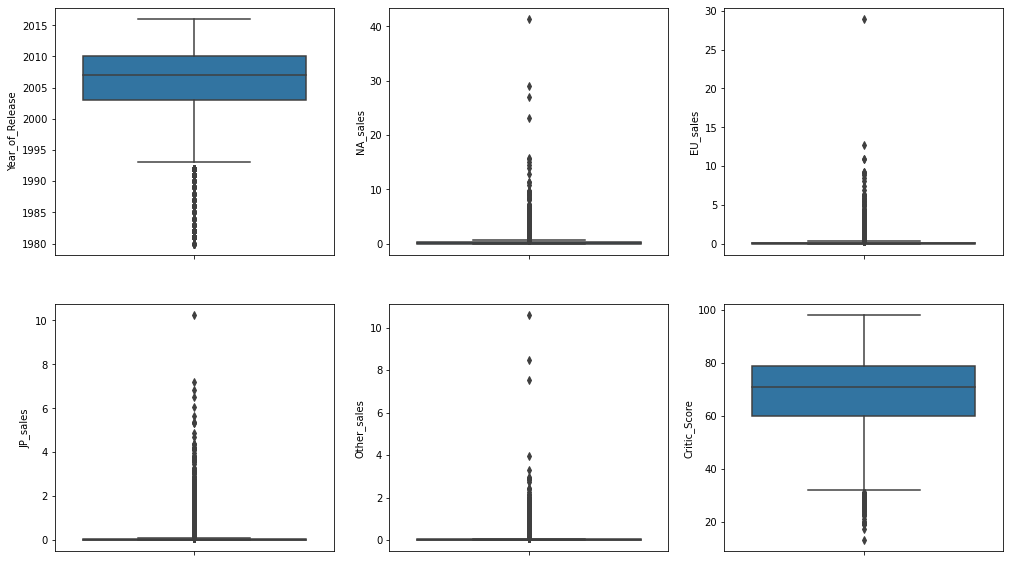

In [10]:
#plot a  boxplot for each numeric column
fig, axis = plt.subplots(ncols=3, nrows=2, figsize=(17, 10))
ax = axis.ravel()
for i in range(len(numerical_columns)):
    plot_boxplot_sns(df_games, numerical_columns[i], ax[i])

#### 1.3 Conclusion.  <a class="anchor" id="step1.3"></a>
[back to table of content](#content)

* the dataset contains 16715 records and 11 columns
* a lot of missing data in ratings and scores
* 31 platforms and 12 genres of games
* many outliers in sales
* most of the data is for the period 1994 - 2016
* string data should be transformed to lowercase

### 2. Data preparation.  <a class="anchor" id="step2"></a>
[back to table of content](#content)

In [11]:
#copy of the dataframe for further work
df_games_prep = df_games.copy()

In [12]:
# the total number of lines in the original dataset
init_row_count = df_games.shape[0]

Let's convert the column names to lowercase:

In [13]:
df_games_prep.columns = df_games_prep.columns.str.lower()

In [14]:
df_games_prep.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Let's also convert all values in string columns to lower case:

In [15]:
#select only string columns from the dataset
str_columns   = [c for c in df_games_prep.columns if df_games_prep[c].dtype.name in ['object', 'bool']]

In [16]:
for column in str_columns:
    df_games_prep[column] = df_games_prep[column].str.lower()

In [17]:
df_games_prep.tail(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.0,0.01,0.0,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.0,0.00,0.0,NaN,NaN,NaN
16714,winning post 8 2016,psv,2016.0,simulation,0.00,0.0,0.01,0.0,NaN,NaN,NaN


#### 2.1 Dealing with missing data.  <a class="anchor" id="step2.1"></a>
[back to table of content](#content)

Let's check the dataset for missing values using the `missing_data ()` function, which takes a dataframe and returns a table with the number of missing values for each column:

In [18]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(1).astype(float)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).reset_index()

In [19]:
missing_data(df_games_prep)

,index,Total,Percent
0,critic_score,8578,51.3
1,rating,6766,40.5
2,user_score,6701,40.1
3,year_of_release,269,1.6
4,genre,2,0.0
5,name,2,0.0
6,other_sales,0,0.0
7,jp_sales,0,0.0
8,eu_sales,0,0.0
9,na_sales,0,0.0


In [20]:
#how many missing values we had in the original dataset
init_nan_count = missing_data(df_games_prep)['Total'].sum()+df_games[df_games['User_Score'] == 'tbd'].shape[0]

Let's start small and remove the gaps with the title and genre, since they are definitely useless for analysis:

In [21]:
df_games_prep = df_games_prep.dropna(subset=['genre', 'name'])

Missing data in year_of_release can be populated with data from other platforms for the same game, if present. All the gaps will not fill up like this, but we will reduce data loss. For this, we create a function `fill_missing_data ()` which will iterate over the dataframe line by line for empty values in the specified column and return the value processed by the specified function on data from other platforms, if information is present, otherwise the missing value is left.

In [22]:
def fill_missing_data(row, df, column, fill_func):
    try:
        if pd.isna(row[column]):
            if fill_func in ['mean', 'median', 'min', 'max']:
                fill_value = df[df['name'] == row['name']][column].agg(fill_func)
                if not pd.isna(fill_value):
                    return fill_value
            elif fill_func == 'mode':
                fill_value = df[df['name'] == row['name']][column].agg(fill_func).to_list()
                if len(fill_value) != 0:
                    return fill_value[0]
        else:
            return row[column]
    except Exception as error:
        print('Filling values failed with error: "{}"'.format(error))

In [23]:
#fill in the missing data in year_of_release with a function as much as possible:
df_games_prep['year_of_release'] = df_games_prep.apply(lambda row: fill_missing_data(row, df_games_prep, 'year_of_release', 'mean'), axis=1)

In [24]:
missing_data(df_games_prep)

,index,Total,Percent
0,critic_score,8576,51.3
1,rating,6764,40.5
2,user_score,6699,40.1
3,year_of_release,146,0.9
4,other_sales,0,0.0
5,jp_sales,0,0.0
6,eu_sales,0,0.0
7,na_sales,0,0.0
8,genre,0,0.0
9,platform,0,0.0


Not perfect, but almost half of the gaps were filled using information on other platforms. The remaining gaps cannot be filled in automatically without additional data, we will leave them.

In [25]:
#let's look at the values in the user rating column
df_games_prep.describe(include=['object'])['user_score']

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

The string values *tbd* here most likely mean *to be defined / to be determined*, which in turn may mean that there is no user rating for the game at the time of data upload. First, replace *tbd* with gaps like *np.nan*, and then try to fill in the gaps with averages for other platforms, if information is present.

In [26]:
df_games_prep['user_score'].replace(to_replace='tbd', value=np.nan, inplace=True)

In [27]:
#let's see if there are any more string values
df_games_prep['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [28]:
#some numbers in str format, let's convert everything to numeric format
df_games_prep['user_score'] = pd.to_numeric(df_games_prep['user_score'])

In [29]:
%%time
#fill in the gaps in 'user_score' by analogy with the year of issue
df_games_prep['user_score'] = df_games_prep.apply(lambda row: fill_missing_data(row, df_games_prep, 'user_score', 'mean'), axis=1)

CPU times: user 10.9 s, sys: 3.68 ms, total: 11 s
Wall time: 11 s


Now let's fill in the gaps in *critic_score* and *rating* according to the same principle, only for the rating we take the mode instead of the average:

In [30]:
%%time
df_games_prep['critic_score'] = df_games_prep.apply(lambda row: fill_missing_data(row, df_games_prep, 'critic_score', 'mean'), axis=1)
df_games_prep['rating'] = df_games_prep.apply(lambda row: fill_missing_data(row, df_games_prep, 'rating', 'mode'), axis=1)

CPU times: user 18.5 s, sys: 20.1 ms, total: 18.5 s
Wall time: 18.5 s


Now let's calculate how much data we deleted in this step:

In [31]:
#The total number of rows after processing
act_row_count = df_games_prep.shape[0]
print('In this chapter we deleted {:.2%} of the original dataset.'.format((init_row_count - act_row_count) / init_row_count))

In this chapter we deleted 0.01% of the original dataset.


Now let's count how much missing data we filled in:

In [32]:
act_nan_count = missing_data(df_games_prep)['Total'].sum()
print('In this chapter, we have reduced the amount of missing data by {:.1%}.'.format((init_nan_count - act_nan_count) / init_nan_count))

In this chapter, we have reduced the amount of missing data by 10.6%.


Let's replace the empty gaps in *rating* with the string "unknown":

In [33]:
df_games_prep['rating'].replace(np.nan, 'unknown', inplace=True)

The remaining missing data cannot be intelligently filled in without additional data, except by manually googling each game. Therefore, we will not touch it.

In [34]:
#check for duplicates
df_games_prep.duplicated().sum()

0

There are no duplicates.

#### 2.2 Convert data types.  <a class="anchor" id="step2.2"></a>
[back to table of content](#content)

Let's convert the data types in the columns as follows:

* *year_of_release*: to int type since year is an integer
* *critic_score*: into int type, since with a 100-point scale, the values after the decimal point have almost no effect on the assessment
* the sales columns will be left in float, as these are millions of copies sold and the digits after the decimal point may be significant
* string data remains unchanged

In [35]:
#let's fill the missing values with zeros so that there is no error when converting the data type
df_games_prep['year_of_release'].fillna(value=0, inplace=True)
df_games_prep['year_of_release'] = df_games_prep['year_of_release'].astype(int)
df_games_prep['critic_score'].fillna(value=0, inplace=True)
df_games_prep['critic_score'] = df_games_prep['critic_score'].astype(int)
df_games_prep['user_score'].fillna(value=0, inplace=True)

#### 2.3 Feature engineering.  <a class="anchor" id="step2.3"></a>
[back to table of content](#content)

Let's calculate the total sales in a separate column:

In [36]:
df_games_prep['total_sales'] = df_games_prep[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [37]:
df_games_prep[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sample(3)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
13121,0.04,0.01,0.00,0.00,0.05
5664,0.03,0.00,0.00,0.28,0.31
4952,0.05,0.04,0.28,0.01,0.38


In a separate column, add the decoding of the *rating* column according to data from the official website www.esrb.org. The "k-a" category has been equated to "e" since 1998, so we will refer to it as "e".

In [38]:
df_games_prep['rating'].unique()

array(['e', 'unknown', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [39]:
#a dictionary describing the meaning of each rating category
rating_dict = {'e': 'for all', 'unknown': 'unknown', 'm': 'for adults',
              't': 'for teenagers', 'e10+': 'from 10 years and older',
              'k-a': 'for all', 'ao': 'only for adults', 'ec': 'for young children',
              'rp': 'rating expected'}

In [40]:
#copy the rating column and change the values using map() method
df_games_prep['rating_description'] = df_games_prep['rating']
df_games_prep['rating_description'] = df_games_prep['rating_description'].map(rating_dict)

In [41]:
df_games_prep[['rating', 'rating_description']].head(3)

,rating,rating_description
0,e,for all
1,unknown,unknown
2,e,for all


#### 2.4 Conclusion.  <a class="anchor" id="step2.4"></a>
[back to table of content](#content)

* there is a lot of missing values in the data, especially in terms of ratings and ratings. We partially filled in the gaps with an average value or mod if there was information from other platforms for the same game. The remaining gaps were left (filled with zeros), since they cannot be restored without additional information.
* column names and all string data have been converted to lower case for easier work
* entries without the name of the game and genre have been removed, this is approximately 0.01% of the entire dataset
* the remaining gaps in the * rating * column were filled with the string 'unknown'
* columns * year_of_release * and * critic_score * were cast to int type, the rest of the data were left in their types, as after import
* additional signs were added: a column with the amount of sales and a decoding of the rating from the ESRB
* possible reasons for the gaps:
    * many older games do not have ESRB ratings, as this agency only started operating in 1994
    * the data was clearly collected from different sources into one table and information could be lost during the merge
    * ratings from users and critics are probably difficult to collect automatically or they were not yet available at the time of data collection

### 3. Data analytics.  <a class="anchor" id="step3"></a>
[back to table of content](#content)

In [42]:
#copy of the dataframe for further work
df_games_analyse = df_games_prep.copy()

Let's see how many games were released per year:

Text(0.5, 1.0, 'How many games were released per year')

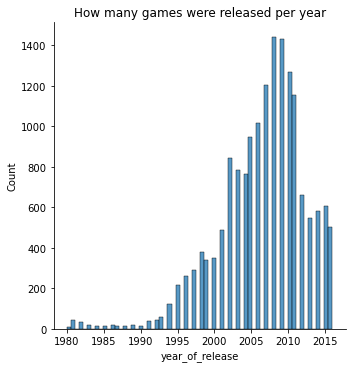

In [43]:
sns.displot(df_games_analyse[df_games_analyse['year_of_release'] != 0].reset_index()['year_of_release'])
plt.title('How many games were released per year')

Until the mid-90s, very few games were released. Since about 1994, the number of games released has steadily grown to a peak in 2008. After 2011, there was a sharp decline (the consequences of the financial crisis?) By half and stabilization until 2016 with a slight negative trend. First, let's look at the data starting from 2000, as it starts a strong increase in the number of games released, which is more significant for us. And only later we will reduce the period based on the intermediate results. Let's create a new dataframe:

In [44]:
df_act_period = df_games_analyse[df_games_analyse['year_of_release'] >= 2000].copy()

#### 3.1 Exploratory data analysis.  <a class="anchor" id="step3.1"></a>
[back to table of content](#content)

Let's look at sales by platform and year and determine which platforms may still be relevant in order to more accurately determine the time period for analysis. Let's click on the platforms according to the legend and filter out those whose distributions are not yet approaching zero in 2016:

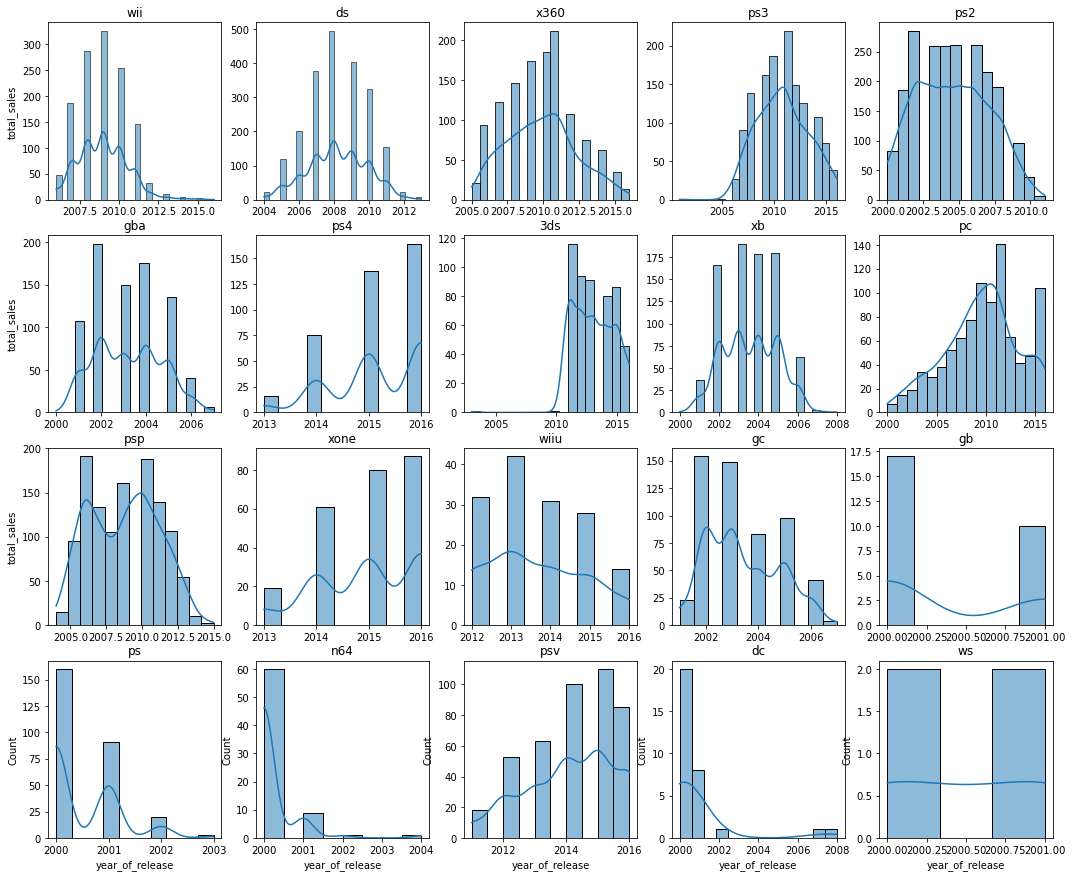

In [45]:
#list of all platforms available
platforms = df_act_period['platform'].unique().tolist()

#plot a  boxplot for each numeric column
fig, axis = plt.subplots(ncols=5, nrows=4, figsize=(18, 15))
ax = axis.ravel()
for i in range(len(platforms)):
    sns.histplot(data=df_act_period[df_act_period['platform'] == platforms[i]][['year_of_release','total_sales']],
                x='year_of_release', ax=ax[i], kde=True)
    ax[i].set_title(platforms[i])
    if i in [0, 5, 10]:
        ax[i].set_ylabel('total_sales')
        ax[i].set_xlabel('')
        if i==15:
            ax[i].set_ylabel('total_sales')
            ax[i].set_xlabel('year_of_release')
    elif i in range(15,20):
        ax[i].set_xlabel('year_of_release')
    else:   
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')  

The distributions of sales by platform show that the following platforms are relevant for 2016: ps4, 3ds, xone, wiiu, psv, pc. The current period can be distinguished starting from **2010**.

By the length of the boxplot at the top of the histogram, one can determine the characteristic period of disappearance of old platforms, that is, the beginning and end of 95% of the interval in the histogram: this is **9 years** on average.

The **pc** platform should be separately noted: the average life cycle is not applicable to this platform due to the peculiarity of the fact that the computer itself is not a game console, so there are no new generations or models here. The hardware improves, but the platform itself remains. Therefore, despite the drop in sales after 2010, pc will still be a relevant platform in the future.

In [46]:
#platforms that will still be relevant for 2017
relevant_platforms = ['ps4', '3ds', 'xone', 'wiiu', 'psv', 'pc']

Let's see how often new platforms appear:

In [47]:
# create a dataframe with platforms,
# where the first year of the release of the game for this platform will be recorded
platform_release_dict = {'platform': [], 'year_of_release': []}
for platform in df_act_period['platform'].unique():
    platform_release_dict['platform'].append(platform)
    platform_release_dict['year_of_release'].append(df_act_period[df_act_period['platform'] == platform]['year_of_release'].min())
df_platform_release = pd.pivot_table(pd.DataFrame(platform_release_dict),
                                     index='year_of_release',
                                     values='platform', aggfunc='count').reset_index()

Text(6.799999999999997, 0.5, 'number of new platforms')

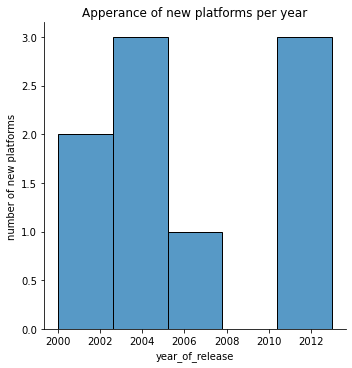

In [48]:
sns.displot(df_platform_release, x='year_of_release')
plt.title('Apperance of new platforms per year')
plt.ylabel('number of new platforms')

On average, new platforms appeared approximately every **5 years**.

Now let's filter the current period from the main dataframe, which we defined above, starting from 2010:

In [49]:
df_act_period_new = df_games_analyse[df_games_analyse['year_of_release'] >= 2010].copy()

Let's select the platforms with the highest total sales for the current period in the TOP10:

In [52]:
#list of top selling platforms of all time
top_platforms = (df_act_period_new
                                  .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                                  .reset_index().groupby(by='platform')
                                  .sum().sort_values(by='total_sales', ascending=False)
                                  .reset_index()
                                  .nlargest(10, ['total_sales'])[['platform', 'total_sales']]
                      )

In [53]:
#function to plot a single barplot
def plot_barplot(data, x, y, title, xlabel=None, ylabel=None, xax_rotation=None):
    plt.figure(figsize=(10,5))
    sns.barplot(data=data, y=y, x=x)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xax_rotation)

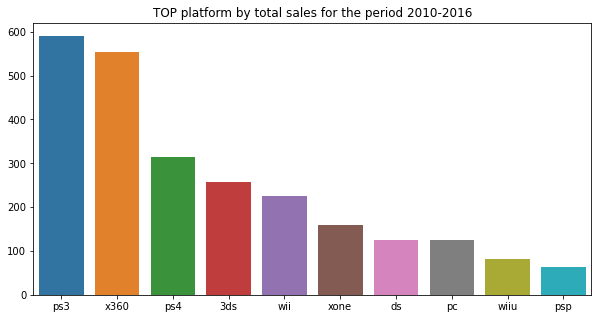

In [54]:
plot_barplot(top_platforms, 'platform', 'total_sales',
             'TOP platform by total sales for the period 2010-2016')

In [55]:
#filter data from top platforms into a separate dataframe
df_top_platforms = df_act_period_new[df_act_period_new['platform'].isin(top_platforms['platform'].to_list())].sort_values(by='year_of_release').copy()

Let's make a pivot table with total sales for all platforms in the current period to look at the trend by year:

In [56]:
platform_sales_trend = pd.DataFrame({'platform':[], 'year_of_release': [], 'total_sales': []})

In [57]:
for name, group_name in df_top_platforms.groupby("platform"):
    to_concat = group_name.pivot_table(index=['platform', "year_of_release"],
                                 values='total_sales',
                                 aggfunc='sum').reset_index()
    platform_sales_trend = pd.concat([platform_sales_trend, to_concat], sort=False)
platform_sales_trend.year_of_release = platform_sales_trend.year_of_release.astype(int)    

Text(0.5, 1.0, 'Sales trend by platform and year')

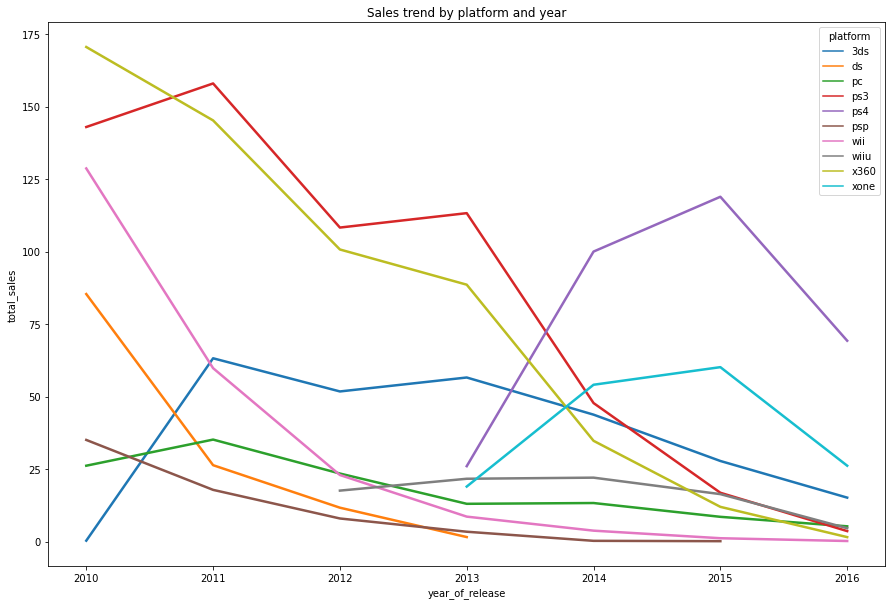

In [58]:
plt.figure(figsize=(15,10))
sns.lineplot(data=platform_sales_trend, x='year_of_release',
             y='total_sales', hue='platform',
             palette="tab10", linewidth=2.5)
plt.title('Sales trend by platform and year')

All platforms have negative sales trends, however, the most promising platforms in the future are **ps4**, **3ds** and **xone**. Their sales until 2016 were high and are likely to be at a similar level in 2017.

In [59]:
#sabe potentially profitable platforms for 2017 in a list
potential_platforms = ['ps4', 'xone', '3ds']

Let's build a boxplot for global sales by platform:

(0.0, 2.0)

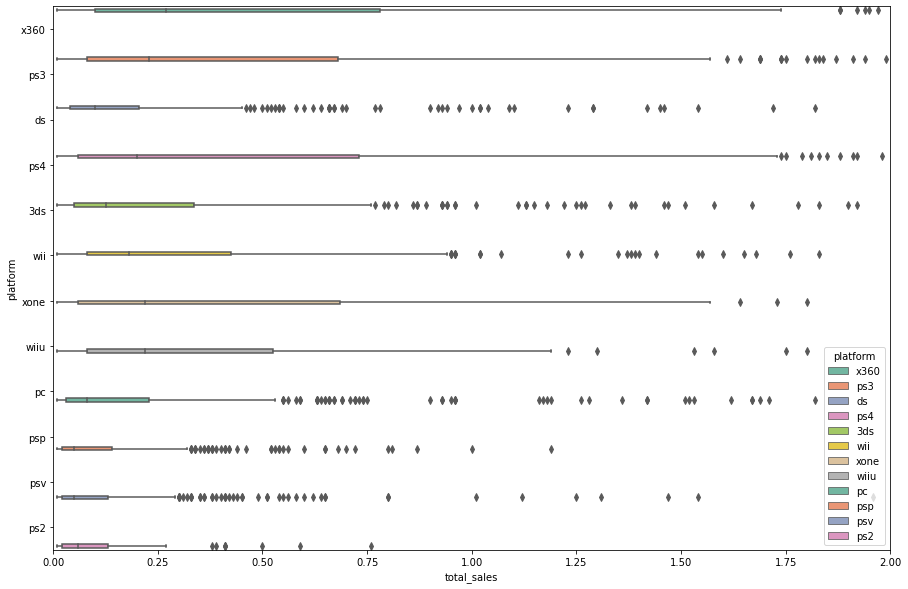

In [60]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_act_period_new, y='platform', x='total_sales',
            hue='platform', orient='h', palette="Set2", width=0.9)
plt.xlim((0,2))

The longest boxes correspond to the most profitable platforms. Their median and average are higher than the rest, and a long mustache towards rising emissions sales suggests that there must have been many 'hits' that sold like hot buns. However, the top selling platforms for the entire period, ps3 and x360, most likely will not be profitable in 2017, as their era is rapidly coming to an end.

Let's analyze the correlation between sales and ratings from critics / users.

In [61]:
#columns for correlation
corr_columns =['total_sales','critic_score','user_score', 'platform']

<Figure size 1080x720 with 0 Axes>

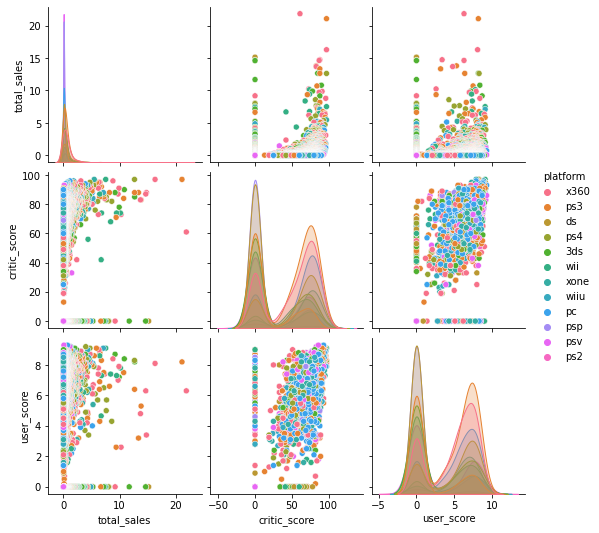

In [62]:
plt.figure(figsize=(15,10))
sns.pairplot(df_act_period_new[corr_columns], hue="platform")

There is no strong dependence of sales on user ratings and critics in general, but there are features for certain platforms. You can also see the correlation between the ratings of critics and users, which means that their impressions of the games coincide.

Let's look at the Pearson's correlation coefficients for one potentially promising platform, **ps4**:

Text(0.5, 1.0, 'Correlation matrix for ps4 platform')

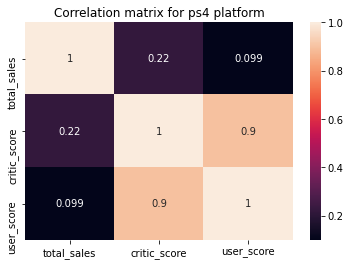

In [63]:
corr_matrix_ps4 = df_act_period_new[df_act_period_new['platform'] == 'ps4'][corr_columns].corr()
sns.heatmap(corr_matrix_ps4, annot=True)
plt.title('Correlation matrix for ps4 platform')

The dependence of sales on the ratings of critics and users for this platform is very weak. Let's look at the rest of the platforms for comparison:

In [64]:
# let's create a dictionary, where for each platform we write two
# of interested correlation coefficients
corr_matrix_dict = {'platform': [],'critic_score': [],'user_score': []}
for platform in df_act_period_new['platform'].unique():
    corr_matrix = df_act_period_new[df_act_period_new['platform'] == platform][corr_columns].corr().reset_index()
    corr_matrix_dict['platform'].append(platform)
    corr_matrix_dict['critic_score'].append(corr_matrix.loc[0, 'critic_score'])
    corr_matrix_dict['user_score'].append(corr_matrix.loc[0, 'user_score'])
    
# make a dataframe from a dictionary and rename the columns
corr_matrix_all = pd.DataFrame(corr_matrix_dict).sort_values(by='critic_score',
                                                             ascending=False)
corr_matrix_all.columns = ['platform',
                           'sales - critics rating correlation',
                           'sales - users rating correlation']

Let's look at the correlation:

In [65]:
corr_matrix_all.style.bar(subset=['sales - critics rating correlation',
                                 'sales - users rating correlation'], color='#5fba7d')

,platform,sales - critics rating correlation,sales - users rating correlation
11,ps2,0.692861,0.616725
10,psv,0.403318,0.377815
5,wii,0.325360,0.290974
1,ps3,0.322074,0.222115
9,psp,0.309539,0.296517
0,x360,0.293493,0.178572
8,pc,0.255335,0.130825
7,wiiu,0.253373,0.243773
3,ps4,0.221667,0.098989
6,xone,0.199815,0.018009


Critics 'and users' ratings do not, on average, affect sales. PS2 stands out from all platforms, where you can see a tangible correlation between ratings and sales. For current platforms, highlighted in yellow, the dependence of sales on ratings is below average.

Now let's look at the distribution of games by genre.

In [66]:
# create a pivot table with game genres and total sales
df_genres = (df_act_period_new.pivot_table(index='genre',
                                          values='total_sales',
                                          aggfunc='sum')
                                                        .reset_index()
                                                        .sort_values(by='total_sales',
                                                                     ascending=False))

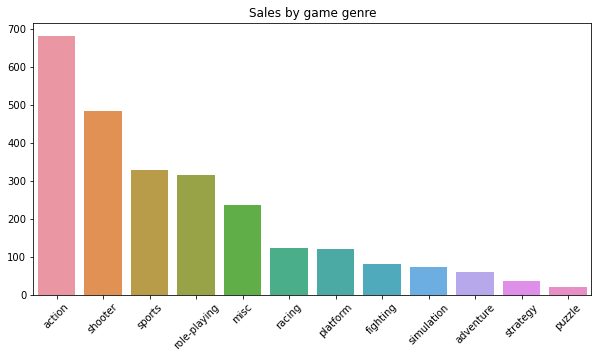

In [67]:
plot_barplot(df_genres, 'genre', 'total_sales', 'Sales by game genre', xax_rotation=45)

The **action** genre leads the way in sales by a noticeable margin. The most profitable genres are in the first TOP5: action, shooter, sports, role-playing, misc. In other genres outside the top five, sales are significantly lower. The difference in sales between the leaders and the unpopular games is huge: for example, sold copies in the action genre are 34 times more than in the most unpopular puzzle genre.

#### 3.2 Conclusion.  <a class="anchor" id="step3.2"></a>
[back to table of content](#content)

* massively games started coming out after 2000
* it was found that the average life cycle of gaming platforms is 9 years, and the appearance frequency of new platforms is 5 years. Exception: the pc platform comparison to game consoles.
* the current research period was adjusted for the period 2010-2016 taking into account the current platforms
* TOP sales platform for the period under review: ps3, xbox360. But their time is rapidly running out and they are no longer relevant.
* in the top sales, ps4, 3ds and xone platforms were highlighted as potentially promising in terms of profit for 2017, as they will still be relevant by that time.
* Sales figures across all platforms show a downtrend. However, the selected promising platforms still have good sales compared to legacy platforms.
* The correlation between sales and ratings of critics / users is observed only for the ps platform, which is no longer relevant. Sales on other platforms are practically independent of estimates.
* TOP5 most profitable genres: action, shooter, sports, role-playing, misc. They are in the lead with a tangible gap from other genres. There is speculation that doses of adrenaline in action and sublimation of a person's primary urges for war in the shooter genre are the main recipes for the success of games.

### 4. Analysis of users by region.  <a class="anchor" id="step4"></a>
[back to table of content](#content)

In [68]:
# copy of dataframe for further work
df_games_regions = df_act_period_new.copy()

In [69]:
#function to create a pivot table
def pivot_table(df, index, values, aggfunc, sortby):
    return df.pivot_table(index=index,
                          values=values,
                          aggfunc=aggfunc).reset_index().sort_values(by=sortby,
                                                                     ascending=False)

In [70]:
#let's store some column and category names in variables
sales_cols = ['total_sales', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']
top_genres = ['action', 'shooter', 'sports', 'role-playing', 'misc']

In [71]:
# create a pivot table with sales by region for each platform
df_regions_platforms = pivot_table(df_games_regions,
                                   'platform',
                                   sales_cols, 'sum', 'total_sales')

In [72]:
# create a pivot table with sales by region for each genre
df_regions_genres = pivot_table(df_games_regions,
                                'genre',
                                sales_cols, 'sum', 'total_sales')

In [73]:
# create a pivot table with sales by region for each ESRB rating score
df_regions_rating = pivot_table(df_games_regions,
                                'rating_description',
                                sales_cols, 'sum', 'total_sales')

#### 4.1 User profile for each region.  <a class="anchor" id="step4.1"></a>
[back to table of content](#content)

### TOP5 platforms worldwide

Let's look at the general picture of the popularity of platforms worldwide:

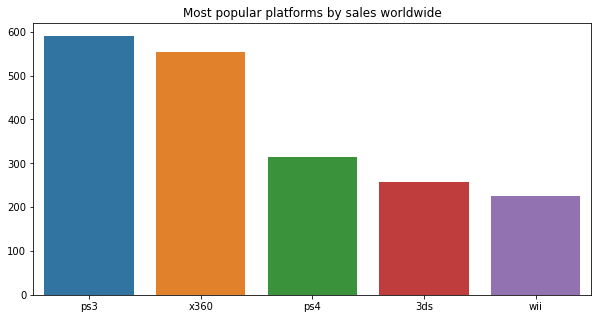

In [74]:
plot_barplot(df_regions_platforms.head(5), 'platform', 'total_sales',
             'Most popular platforms by sales worldwide')

Most popular platforms worldwide are: ps3, x360, ps4, 3ds, wii.

### TOP5 platforms by region

Now let's take a look at TOP5 best selling platforms by region:

In [75]:
#unpivot our table for visualization
df_regions_platforms_melt = df_regions_platforms.head(5).reset_index().melt(id_vars='platform').loc[5:]
df_regions_platforms_melt.columns = ['platform', 'region', 'sales']

Text(0.5, 1.0, 'TOP5 platforms by region and sales')

<Figure size 1080x720 with 0 Axes>

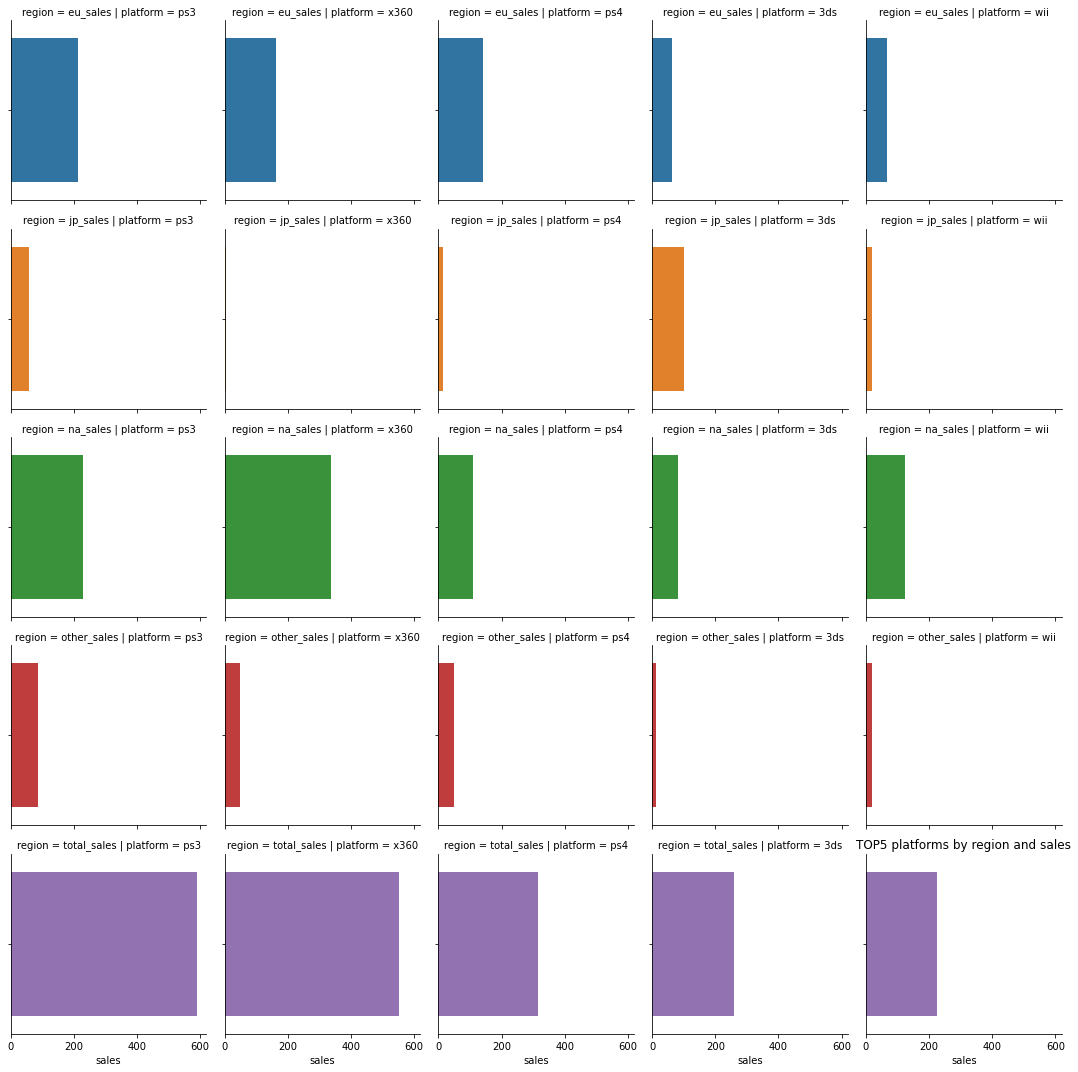

In [76]:
#plot a FacetGrid plot
plt.figure(figsize=(15,10))
g= sns.FacetGrid(data=df_regions_platforms_melt, row='region', col='platform', hue='region')
g.map(sns.barplot, 'sales', order='sales')
plt.title('TOP5 platforms by region and sales')

It is immediately noticeable that the Japanese market differs from other regions in terms of platform popularity. 3ds is number one in sales here, while ps3 is number one in Europe, America and other regions. We can say that the distribution of platform popularity in Europe, America and other regions is very similar, but in Japan they differ markedly, except perhaps for the ps3, where in Japan this console is in second place in popularity. For example, copies of games on the x360 console were sold 50 times !!! less in Japan than in the states. Meanwhile, the difference in sales for the most popular Japanese platform 3ds was only 20% higher in Japan than in America.

Let's look at the TOP5 bestsellers by genre, platform and ESRB rating for each region.

In [77]:
#function to plot 3 pie charts in a row
def plot_3_pie_charts(df_platform, df_genre, df_esrb, region, title_1, title_2, title_3):
    fig, axis = plt.subplots(ncols=3, nrows=1, figsize=(15, 8))
    ax = axis.ravel()
    
    df_platform.plot(kind='pie', y=region, autopct='%1.0f%%',
                     legend=False,labels=df_platform[df_platform.columns[0]], ax=ax[0])
    ax[0].set_title(title_1)
    ax[0].set_ylabel('')

    
    df_genre.plot(kind='pie', y=region, autopct='%1.0f%%',
                  legend=False, labels=df_genre[df_genre.columns[0]], ax=ax[1])
    ax[1].set_title(title_2)
    ax[1].set_ylabel('')

    
    df_esrb.plot(kind='pie', y=region, autopct='%1.0f%%',
                 legend=False, labels=df_esrb[df_esrb.columns[0]], ax=ax[2])
    ax[2].set_title(title_3)
    ax[2].set_ylabel('')

In [78]:
#function to filter TOP5 categories by sales (genre, platform, rating) for a region:
def get_top5(df, region):
    return df.sort_values(by=region, ascending=False).head(5)   

#### Europe

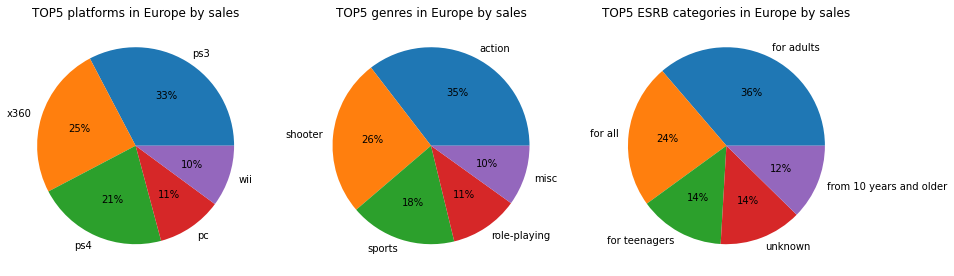

In [79]:
plot_3_pie_charts(get_top5(df_regions_platforms, 'eu_sales'),
                  get_top5(df_regions_genres, 'eu_sales'),
                  get_top5(df_regions_rating, 'eu_sales'),
                  'eu_sales', 'TOP5 platforms in Europe by sales',
                  'TOP5 genres in Europe by sales',
                  'TOP5 ESRB categories in Europe by sales')

#### North America

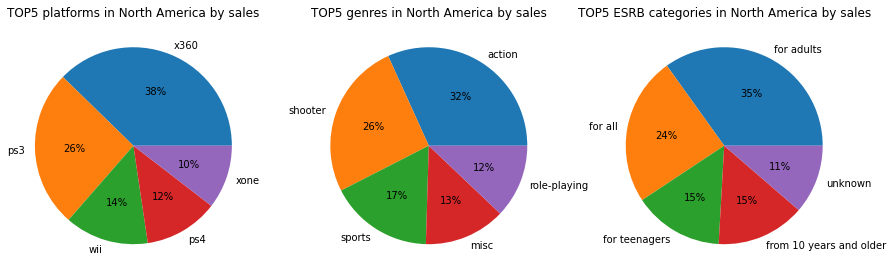

In [80]:
plot_3_pie_charts(get_top5(df_regions_platforms, 'na_sales'),
                  get_top5(df_regions_genres, 'na_sales'),
                  get_top5(df_regions_rating, 'na_sales'),
                  'na_sales', 'TOP5 platforms in North America by sales',
                  'TOP5 genres in North America by sales',
                  'TOP5 ESRB categories in North America by sales')

#### Japan

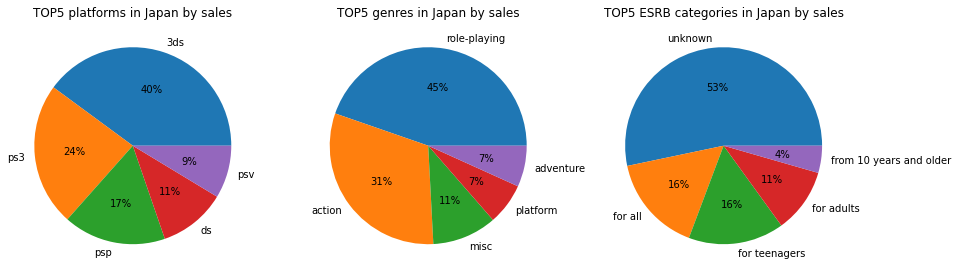

In [81]:
plot_3_pie_charts(get_top5(df_regions_platforms, 'jp_sales'),
                  get_top5(df_regions_genres, 'jp_sales'),
                  get_top5(df_regions_rating, 'jp_sales'),
                  'jp_sales', 'TOP5 platforms in Japan by sales',
                  'TOP5 genres in Japan by sales',
                  'TOP5 ESRB categories in Japan by sales')

**Platforms**

It can be seen that the tops in Europe and America are similar, but in Japan they are different. It is noteworthy that the pc platform is present only in the European list and with a solid 56% share of total sales. That is, PC games are much more relevant in Europe than in other regions.

The picture is similar with the Japanese tops: here the most popular platforms are generally absent among the tops of other regions. That is, we can say that these are platforms purely for the Japanese market, where their share of sales is high - for example, 39% for 3ds and 66% for psp.

Portable consoles that can be carried around like a smartphone are very popular in Japan. They can be played everywhere: on the subway, during lunch breaks. The peculiarities of the Japanese market may have a number of reasons that are beyond the scope of this work:
* a special culture, very different from Western civilization, and as a result - special preferences in games
* the market is completely occupied by 'locals' and it is difficult for foreigners to get there
* due to their historical isolationism (Sakoku), the Japanese are inherent in a great distrust and caution about everything from the outside world, so the popular Western platforms could simply not take root here

**Genres**

As well as across platforms, we see the difference in popular genres in the regions. Again, Europe and America are very similar, but Japan is different: here role-playing games are in the first place (in the fourth place in the world), but only in the second is the action genre. Of the world TOP5 genres in the Japanese top, only 3: action, role-playing and misc.

Here again the features of Japanese culture and market:
* this is a whole mass culture of their 'Anime' comics and manga
* Japan released the first role-playing game, and basically all games in this genre are released for the domestic market


**Impact of ESRB rating**

In America and Europe, games *for adults* are noticeably leading, and in Japan *for teenagers* and *for all*.
The *games for adults* category includes *action* and *shooter*, which top the list by genre in Europe and America. There is a lot of violence and gore. In Japan, in the first place in the genre of role-playing games, which are allowed for adolescents or without restrictions, since there is no realistic violence.

Most likely it is not the rating that affects the sales, but the genre of the game.

#### 4.2 Conclusion.  <a class="anchor" id="step4.2"></a>
[back to table of content](#content)

General:
* North American and European markets are very similar in platform preference and game genres
* The Japanese market is very different from the rest, with handheld consoles more popular than stationary ones
* popular genres in America and Europe are very similar, but in Japan they are different
* North America leads in terms of sales shares in top platforms, the least share in Japan
* PC games sell well only in Europe

You can create the following user profile by region:
* North America NA:
    * TOP genres: action, shooters, sports games
    * TOP platforms: stationary platforms - ps4, xone
    
* Europe EU:
    * TOP genres: action, shooters, sports games
    * TOP platforms: stationary platforms - ps4, pc
    
* Japan JP:
    * TOP genres: RPG, action, mixed genre (misc)
    * TOP platforms: portable platforms - 3ds, psv

### 5. Hypothesis testing. <a class="anchor" id="step5"></a>
[back to table of content](#content)

In [82]:
# copy of dataframe for further work
df_games_hypothesis = df_games_regions[['platform', 'genre', 'user_score']].copy()

Before starting stat tests, let's remove the gaps in the relevant columns:

In [83]:
missing_data(df_games_hypothesis)

,index,Total,Percent
0,user_score,0,0.0
1,genre,0,0.0
2,platform,0,0.0


The is no missing data.

First let's compare the distributions of the parameters before statistical tests:

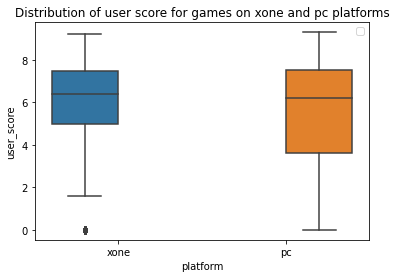

In [84]:
#filter necessary data
xone_pc_score = df_games_hypothesis.query('platform == "xone" or platform == "pc"')

plt.figure(figsize=(6,4))
sns.boxplot(data=xone_pc_score, y='user_score', x='platform', hue='platform')
plt.title('Distribution of user score for games on xone and pc platforms')
plt.legend('')

As we see in the boxplot, the median values of user score are almost similar, but pc platform has a higher dispersion.

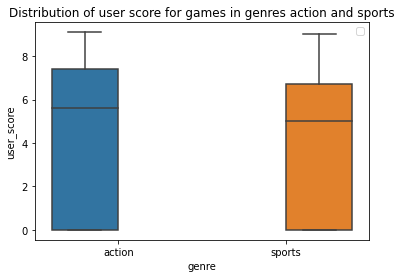

In [85]:
action_sports_score = df_games_hypothesis.query('genre == "action" or genre == "sports"')

plt.figure(figsize=(6,4))
sns.boxplot(data=action_sports_score, y='user_score', x='genre', hue='genre')
plt.title('Distribution of user score for games in genres action and sports')
plt.legend('')

Distributions of user score for the genres action and sports look visually similar. Let's proceed to statistical tests, to check it.

#### 5.1 Hypothesis 1 - Average user ratings for Xbox One and PC platforms are the same.  <a class="anchor" id="step5.1"></a>
[back to table of content](#content)

When formulating two-sided hypotheses, the zero is always the one that claims the equality of two general populations with each other. The alternative one speaks of their difference. To test hypotheses, we use the nonparametric Mann-Whitney test.

In [86]:
#let's make a function to calculate the p-value
#using the Mann-Whitney test to test hypotheses
def u_test(sample1, sample2, alpha):
    result = st.mannwhitneyu(sample1, sample2)
    print('p-value: {:.4f}'.format(result.pvalue))
    if result.pvalue > alpha:
        print("It was not possible to reject the null hypothesis.")
    else:
        print("We reject the null hypothesis.")

Let's formulate the hypotheses:
* Null Hypothesis H0: Average user ratings for Xbox One and PC platforms are the same.
* Alternative Hypothesis H1: Average user ratings for Xbox One and PC platforms differ.

In [87]:
#critical level of statistical significance 5%
alpha = 0.05

In [88]:
u_test(df_games_hypothesis.query('platform == "xone"')['user_score'],
       df_games_hypothesis.query('platform == "pc"')['user_score'],
       alpha)

p-value: 0.2000
It was not possible to reject the null hypothesis.


#### 5.2 Hypothesis 2 - The average user ratings of the Action and Sports genres are different.  <a class="anchor" id="step5.2"></a>
[back to table of content](#content)

* Null Hypothesis H0: Average user ratings for Action and Sports genres are the same.
* Alternative Hypothesis H1: Average user ratings for Action and Sports genres are different.

In [89]:
u_test(df_games_hypothesis.query('genre == "action"')['user_score'],
       df_games_hypothesis.query('genre == "sports"')['user_score'],
       alpha)

p-value: 0.0040
We reject the null hypothesis.


#### 5.3 Conclusion.  <a class="anchor" id="step5.3"></a>
[back to table of content](#content)

* could not reject the hypothesis that the average user ratings for the Xbox One and PC platforms are the same. The statistical probability of randomness of 20% is too high.
* reject the hypothesis that the average user ratings for the Action and Sports genres are the same. The p-value is an order of magnitude lower than the alpha threshold.

### 6. Summary.  <a class="anchor" id="step6"></a>
[back to table of content](#content)

**Data import and preparation**
* the received data was in CSV format and their total volume was 16715 lines and 11 columns
* the data was collected from open sources and contained many gaps in ratings and assessments
* data with ratings and grades contained about 50% of gaps. Partially managed to recover about 10% of the passes using information on other platforms. The data with the absence of the name of the game was deleted, it was only 0.01%. The remaining gaps could not be filled intelligently without additional data automatically. Therefore, we left them.
* numeric columns, except for sales and user ratings, were cast to int
* Column names and string data have been converted to lower case. The abbreviation *tbd* in user ratings has been replaced with a blank to avoid mixed data types in the same column.
* missing ESRB rating has been replaced with *'unknown'*
* additional signs were added to the main table with data:
    * total sales for all regions for each game
    * transcript of the ESRB rating in English for clarity
    
**Data Exploration**
* very few games were released until the mid-90s. Since about 1994, the number of games released has steadily increased to a peak in 2008. After 2011, there was a sharp decline in half and stabilization until 2016 with a slight negative trend. Most likely, the majority of the market was occupied by games on smartphones, which are not included in the data.
* the analysis revealed that the average lifetime of gaming platforms is 9 years, and the appearance of new ones is 5 years. Based on this, the relevant time period for the study was adjusted for 2010 - 2016, although for current platforms this period will be the last 3-4 years.
* according to distributions of sales, platforms were identified that will still be relevant in 2017: 'ps4', '3ds', 'xone', 'wiiu', 'psv', 'pc'
* All platforms have had a negative sales trend since 2011. However, the most promising platforms in the future are *ps4*, *3ds*, *pc* and *xone*. Their sales until 2016 were high and are likely to be at a similar level in 2017.
* Separately, the *pc* platform should be noted: the average life cycle is not applicable to this platform due to the peculiarity of the fact that the computer itself is not a game console, so there are no new generations or models. The hardware improves, but the platform itself remains. Therefore, despite the drop in sales after 2010, pc will still be a relevant platform in the future.

**Impact of Critics' and User's Ratings on Sales**
* The correlation between sales and ratings of critics / users is observed only for the ps platform, which is no longer relevant. Sales on other platforms are practically independent of estimates (Pearson coefficient 0.2).

**Impact of ESRB rating on sales**
* In America and Europe, games *for adults* are noticeably leading, and in Japan *for teenagers* and *for all*.
* In the category of games *for adults* just the same fall *action* and *shooter*, which tops the top list by genre in Europe and America. There is a lot of violence and gore.
* In Japan, in the first place in the genre of role-playing games, which are allowed for adolescents or without restrictions, since there is no realistic violence.
* Most likely it is not the rating that affects the sales, but the genre of the game.

**Impact of game genre on sales**
* top selling genres of games: action, shooter, sports, role-playing, misc
    * for America and Europe there is a common top
    * for Japan: role-playing, action, misc, platform, adventure

**Potentially profitable platform genres in the future by region**
* North America NA:
    * TOP genres: action, shooters, sports games
    * TOP platforms: stationary platforms - ps4, xone
    
* Europe EU:
    * TOP genres: action, shooters, sports games
    * TOP platforms: stationary platforms - ps4, pc
    
* Japan JP:
    * TOP genres: RPG, action, mixed genre (misc)
    * TOP platforms: portable platforms - 3ds, psv
 
* the biggest sales share, about 86%, in North America and Europe